1. 지하철 시간대별 이용 현황 데이터 정제하기
2. 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까?
3. 밤 11시 사람들이 가장 많이 타는 역은?
4. 시간대별로 사람들이 가장 많이 타고 내리는 역은?
5. 모든 지하철역에서 시간대별 승하차 인원을 모두 더하면?

In [1]:
# 한글 깨짐 방지
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


지하철 시간대별 이용 현황 데이터 정제하기

In [2]:
import csv
f = open('/content/subwayTime.csv')
data = csv.reader(f)

for row in data:
  print(row)

['\ufeff사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', '', '05:00:00~05:59:59', '', '06:00:00~06:59:59', '', '07:00:00~07:59:59', '', '08:00:00~08:59:59', '', '09:00:00~09:59:59', '', '10:00:00~10:59:59', '', '11:00:00~11:59:59', '', '12:00:00~12:59:59', '', '13:00:00~13:59:59', '', '14:00:00~14:59:59', '', '15:00:00~15:59:59', '', '16:00:00~16:59:59', '', '17:00:00~17:59:59', '', '18:00:00~18:59:59', '', '19:00:00~19:59:59', '', '20:00:00~20:59:59', '', '21:00:00~21:59:59', '', '22:00:00~22:59:59', '', '23:00:00~23:59:59', '', '00:00:00~00:59:59', '', '01:00:00~01:59:59', '', '02:00:00~02:59:59', '', '03:00:00~03:59:59', '']
['', '', '', '', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차']
['2019-01', '1호선', '150', '서울역', '927', '22', '10682', '877

헤더를 제외하고 map함수를 활용한 데이터 타입 바꾸기(문자열 -> 정수)

In [3]:
import csv
f = open('/content/subwayTime.csv')
data = csv.reader(f)

next(data)
next(data)

for row in data:
  row[4:] = map(int, row[4:]) #중요!!  int로 바꿔라, row[4:] 4번째 인덱스부터 끝까지 그리고 다시 row[4:]에 담아라
  print(row)

['2019-01', '1호선', '150', '서울역', 927, 22, 10682, 8774, 13504, 45545, 39110, 103863, 80492, 236747, 61108, 163026, 68446, 86198, 89100, 80051, 98021, 85869, 101282, 91792, 86627, 86386, 113919, 87211, 118223, 91594, 161216, 98032, 249973, 105075, 142575, 77807, 97729, 55056, 96955, 46680, 70982, 35481, 33149, 19442, 3612, 7167, 0, 410, 0, 0, 0, 0]
['2019-01', '1호선', '151', '시청', 74, 0, 2409, 4049, 3532, 19241, 7703, 66876, 9978, 209349, 12818, 88793, 16470, 49343, 22512, 45645, 26040, 41405, 34728, 46800, 40497, 40429, 51586, 34787, 54591, 29029, 80258, 28534, 170225, 28331, 76142, 15634, 57394, 9141, 58745, 8204, 38156, 6345, 14478, 4079, 981, 1256, 3, 29, 0, 0, 0, 0]
['2019-01', '1호선', '152', '종각', 100, 8, 4409, 5105, 4593, 26969, 6733, 104259, 11028, 300081, 14563, 167611, 20165, 80474, 34617, 76633, 42088, 71920, 59893, 75678, 68149, 62408, 84211, 57607, 96197, 55889, 144446, 63459, 257735, 83206, 134259, 51603, 113555, 19039, 135586, 12188, 111743, 8286, 54264, 5560, 4886, 1722, 0,

출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까
* 아침 7시 승차 데이터 추출 -> 10번 인덱스 데이터 값 추출

In [4]:
import csv
f = open('/content/subwayTime.csv')
data = csv.reader(f)

next(data)
next(data)

result = [] # 아침 7시 승차 데이터 추출 (10번째 인덱스)

for row in data:
  row[4:] = map(int, row[4:])
  result.append(row[10])

print(len(result))
print(result)

598
[39110, 7703, 6733, 6066, 5143, 14893, 20077, 22615, 46015, 6088, 5822, 8459, 5822, 3225, 7973, 27835, 38199, 31012, 6313, 23263, 25458, 59821, 70814, 99368, 45639, 130638, 59461, 18787, 17974, 23502, 16391, 48487, 27365, 14946, 26301, 78413, 89675, 146181, 84974, 243083, 99608, 154641, 77272, 153133, 46364, 45277, 56578, 48068, 75744, 40444, 18646, 26197, 18343, 7965, 6917, 3353, 3160, 32301, 43628, 4860, 3988, 91650, 148741, 58325, 55607, 62354, 14773, 16297, 15231, 6464, 1992, 2337, 0, 5340, 25921, 27033, 24997, 17015, 13731, 16790, 28669, 8261, 27157, 36344, 15093, 8325, 25900, 3695, 25425, 21481, 38038, 22032, 23508, 26639, 49477, 101709, 59128, 108209, 141391, 127573, 54631, 92454, 88501, 52815, 33607, 17800, 5662, 7510, 10424, 5612, 6458, 12348, 18564, 5669, 11193, 13780, 4651, 49720, 78726, 3340, 6380, 12719, 21239, 19333, 31594, 42323, 9949, 24815, 39212, 15241, 47110, 44522, 37137, 89122, 28664, 89750, 19514, 28555, 71907, 42380, 77372, 43514, 16219, 48837, 9716, 9749, 21

아침 7시 승차 데이터 막대 그래프로 표현하기


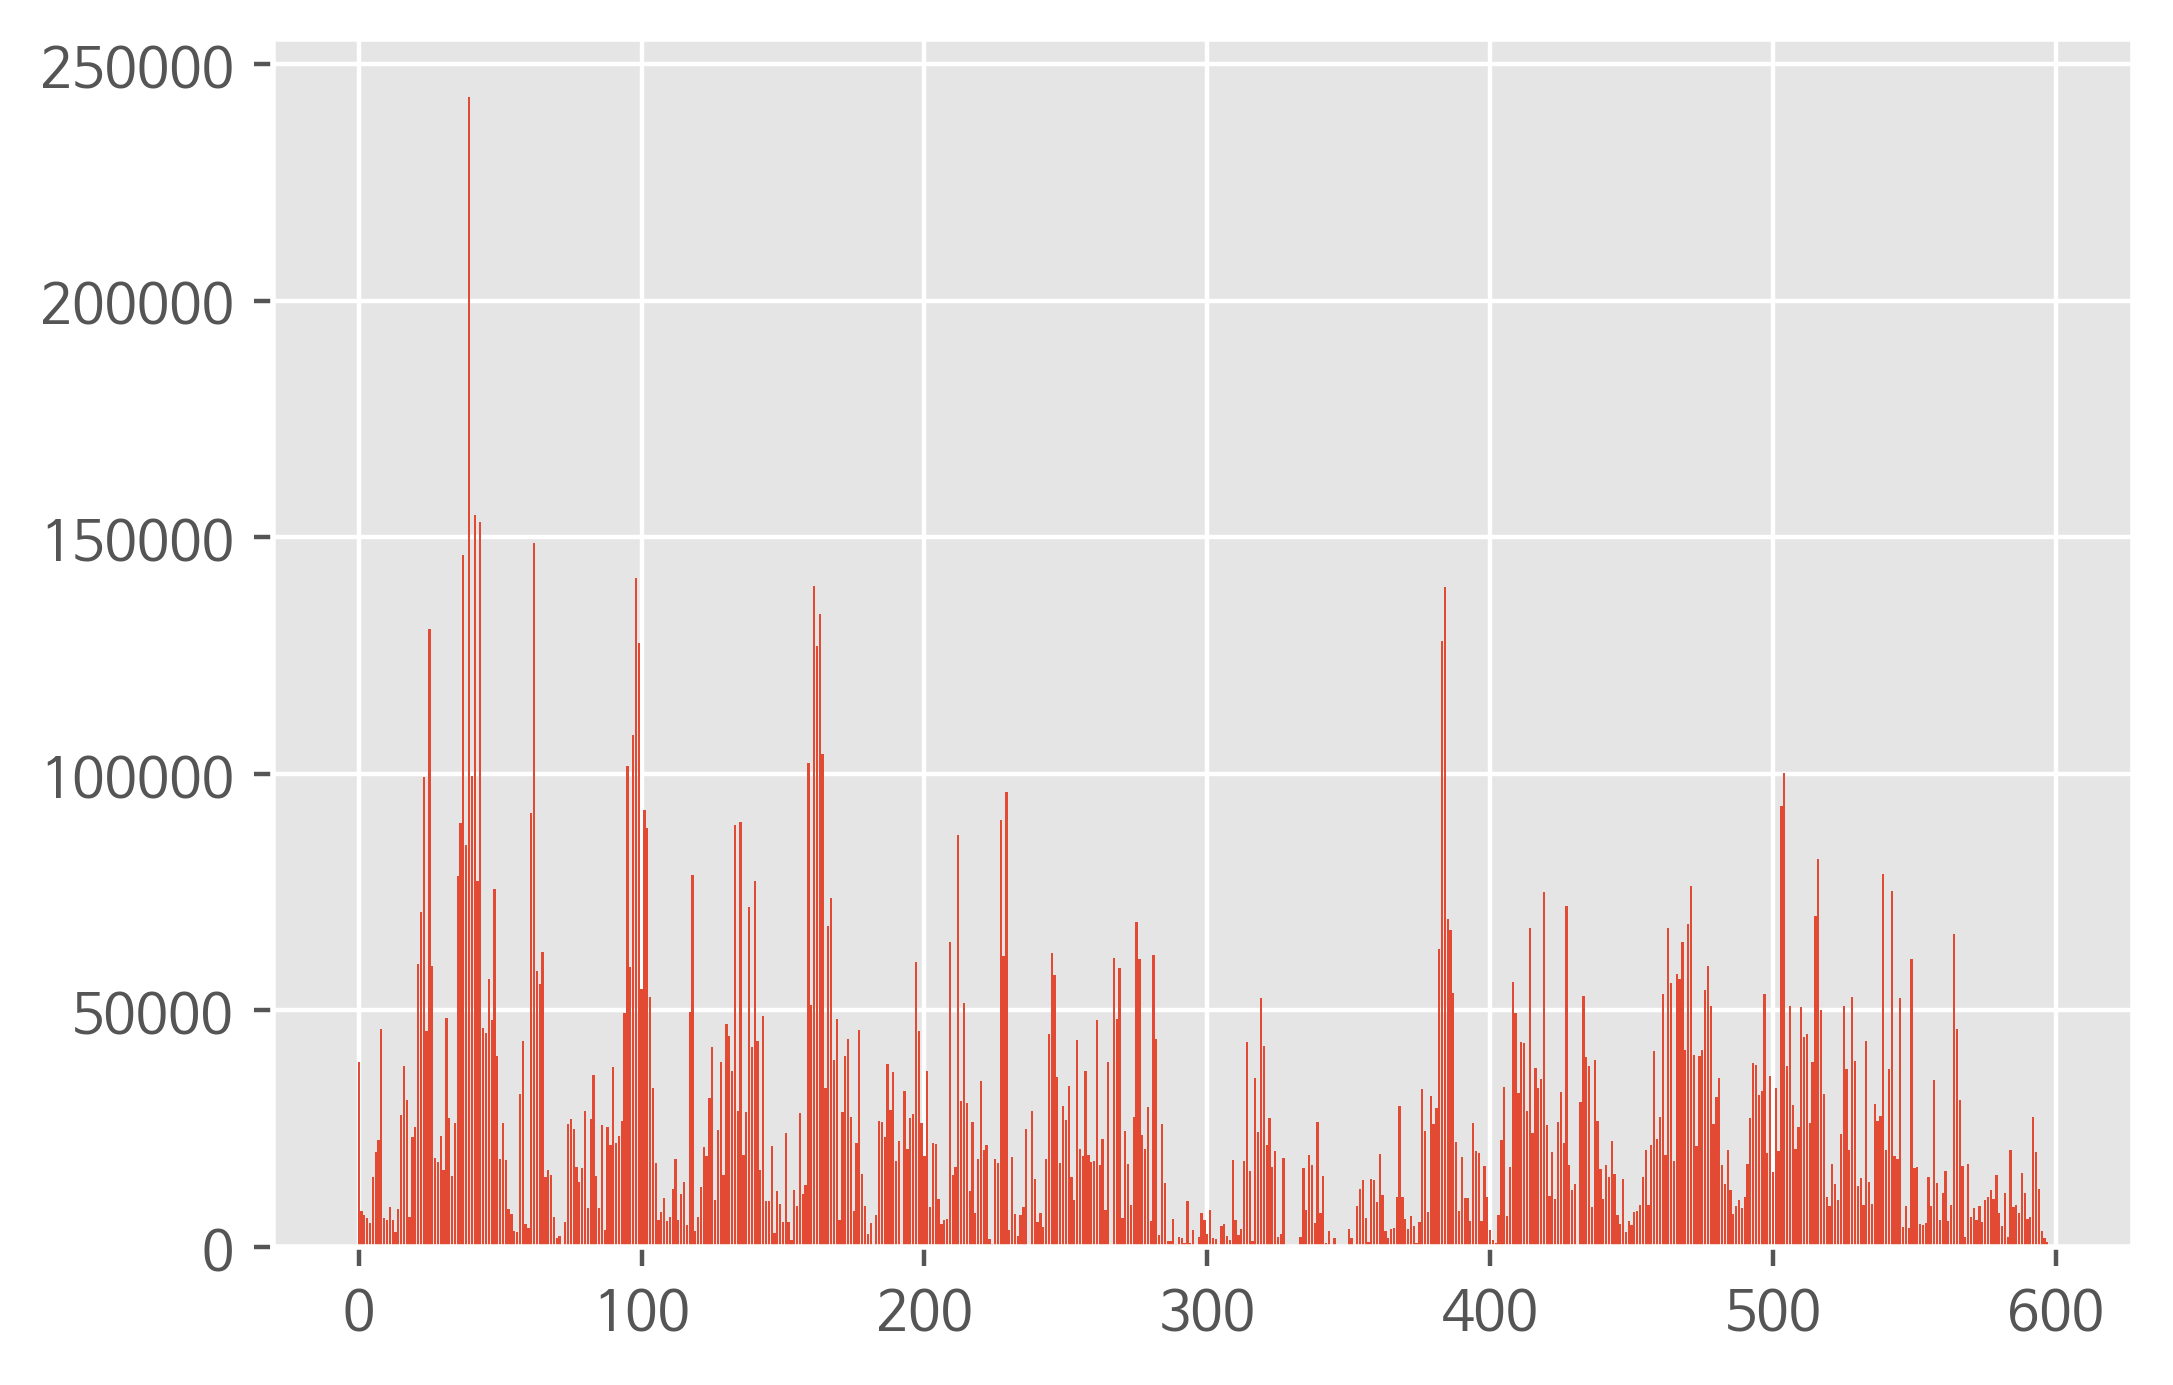

In [6]:
import csv
import matplotlib.pyplot as plt

f = open('/content/subwayTime.csv')
data = csv.reader(f)

next(data)
next(data)

result = [] # 아침 7시 승차 데이터 추출 (10번째 인덱스)

for row in data:
  row[4:] = map(int, row[4:])
  result.append(row[10])

plt.figure(dpi=200)
plt.style.use('ggplot')
plt.bar(range(len(result)), result)
plt.show()

오름차순으로 데이터 정렬하여 그래프 그리기

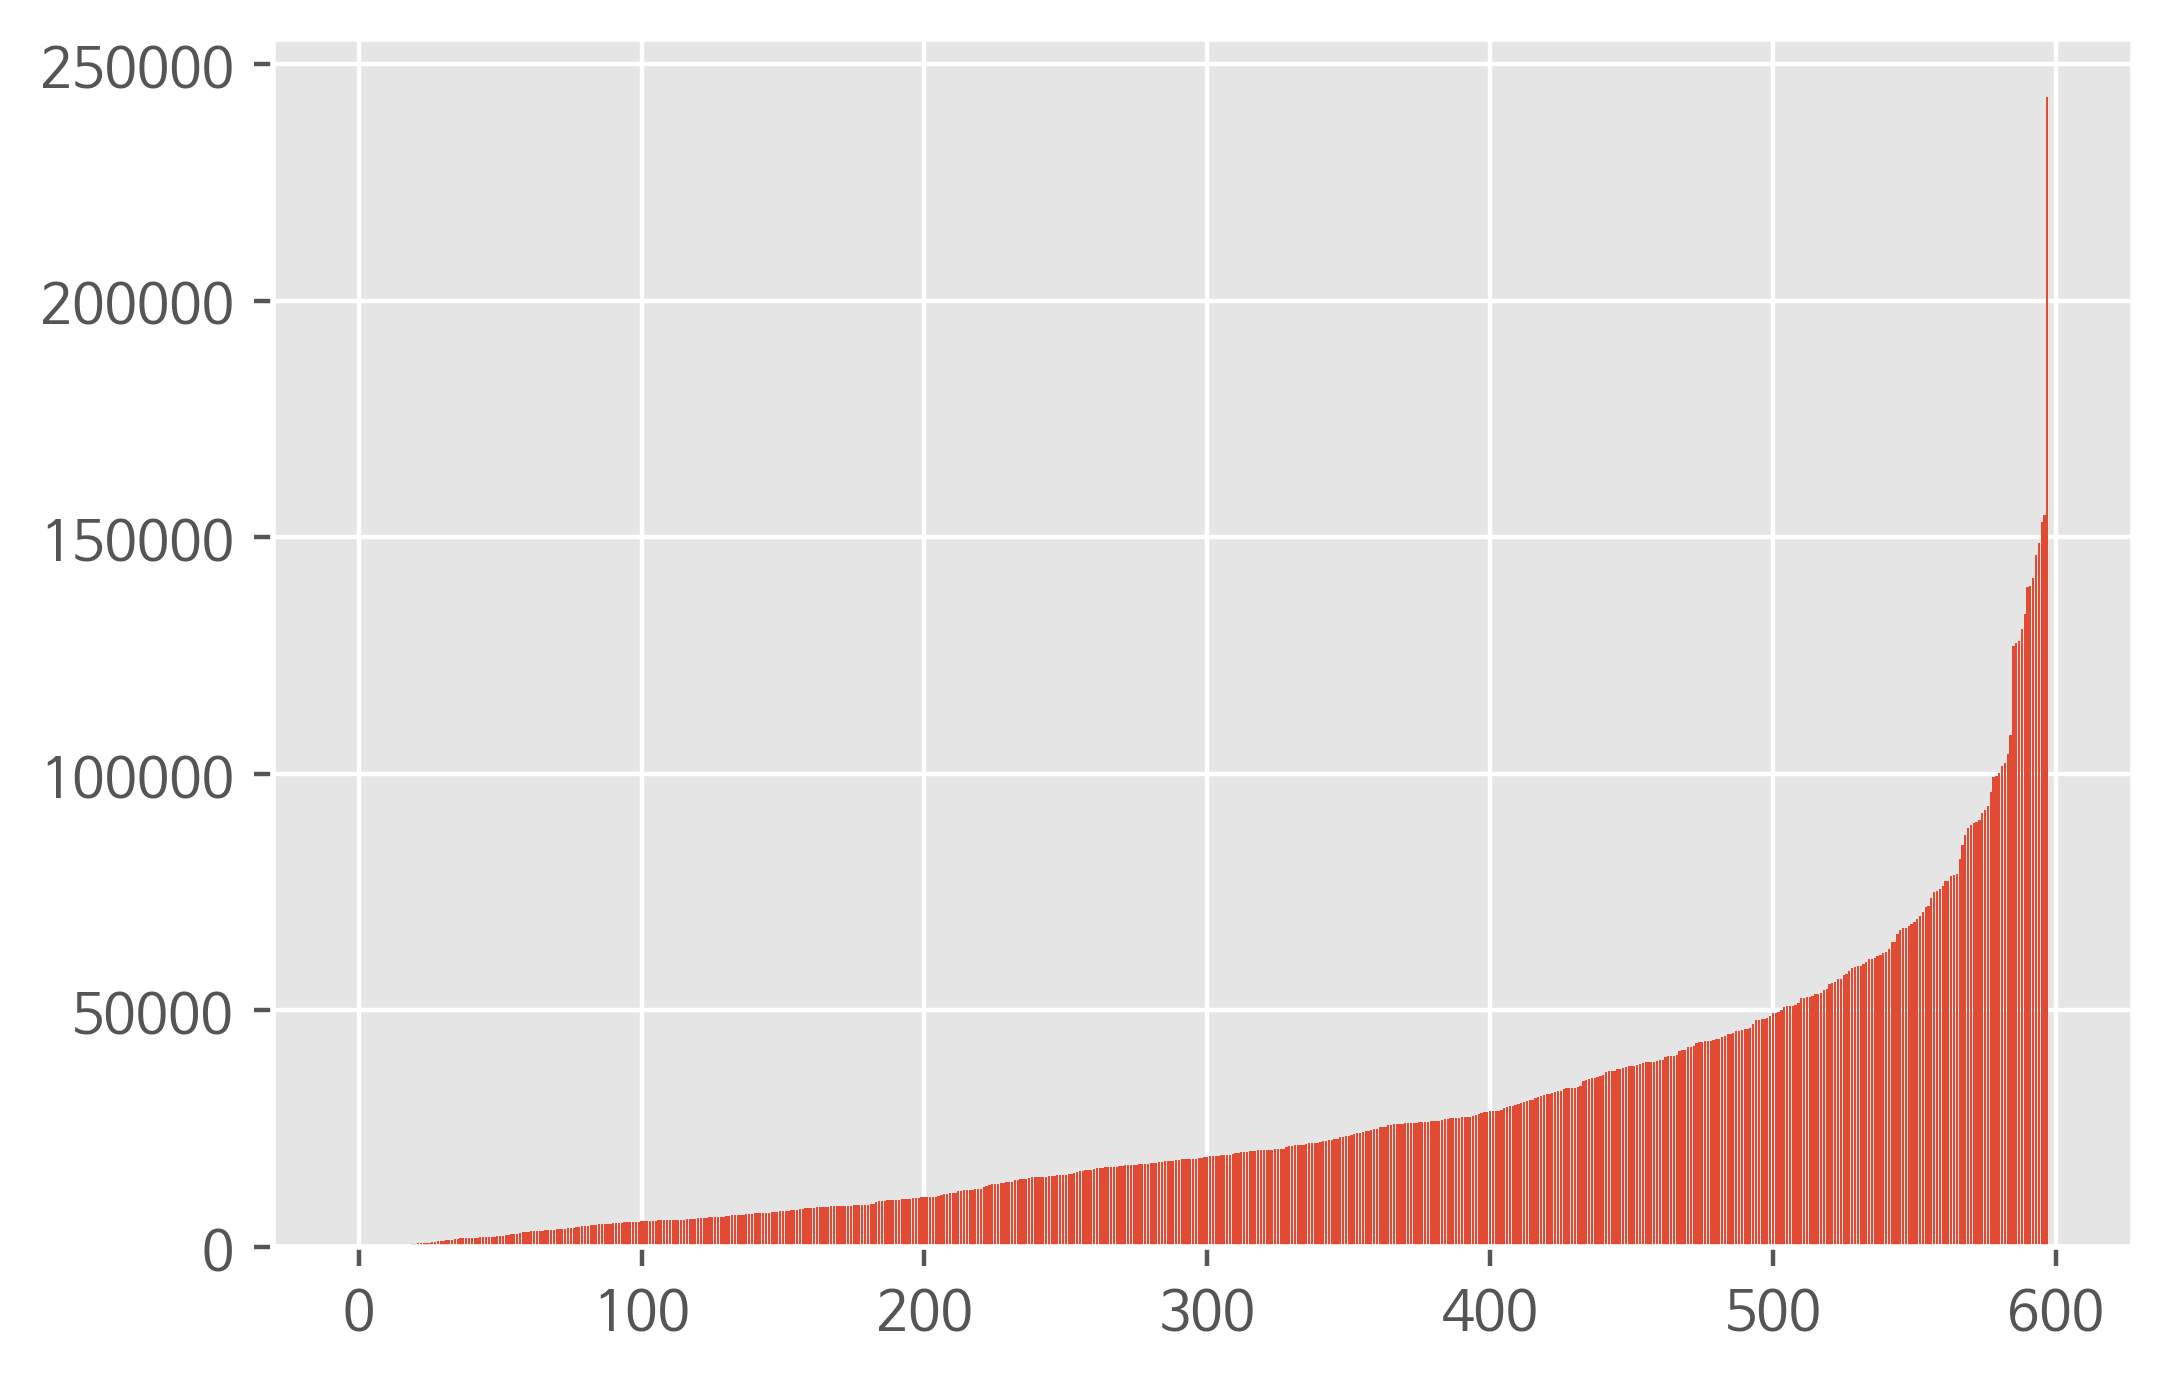

In [7]:
import csv
import matplotlib.pyplot as plt

f = open('/content/subwayTime.csv')
data = csv.reader(f)

next(data)
next(data)

result = [] # 아침 7시 승차 데이터 추출 (10번째 인덱스)

for row in data:
  row[4:] = map(int, row[4:])
  result.append(row[10])

result.sort() #데이터를 오름차순 정렬

# 데이터 시각화
plt.figure(dpi=200)
plt.style.use('ggplot')
plt.bar(range(len(result)), result)
plt.show()

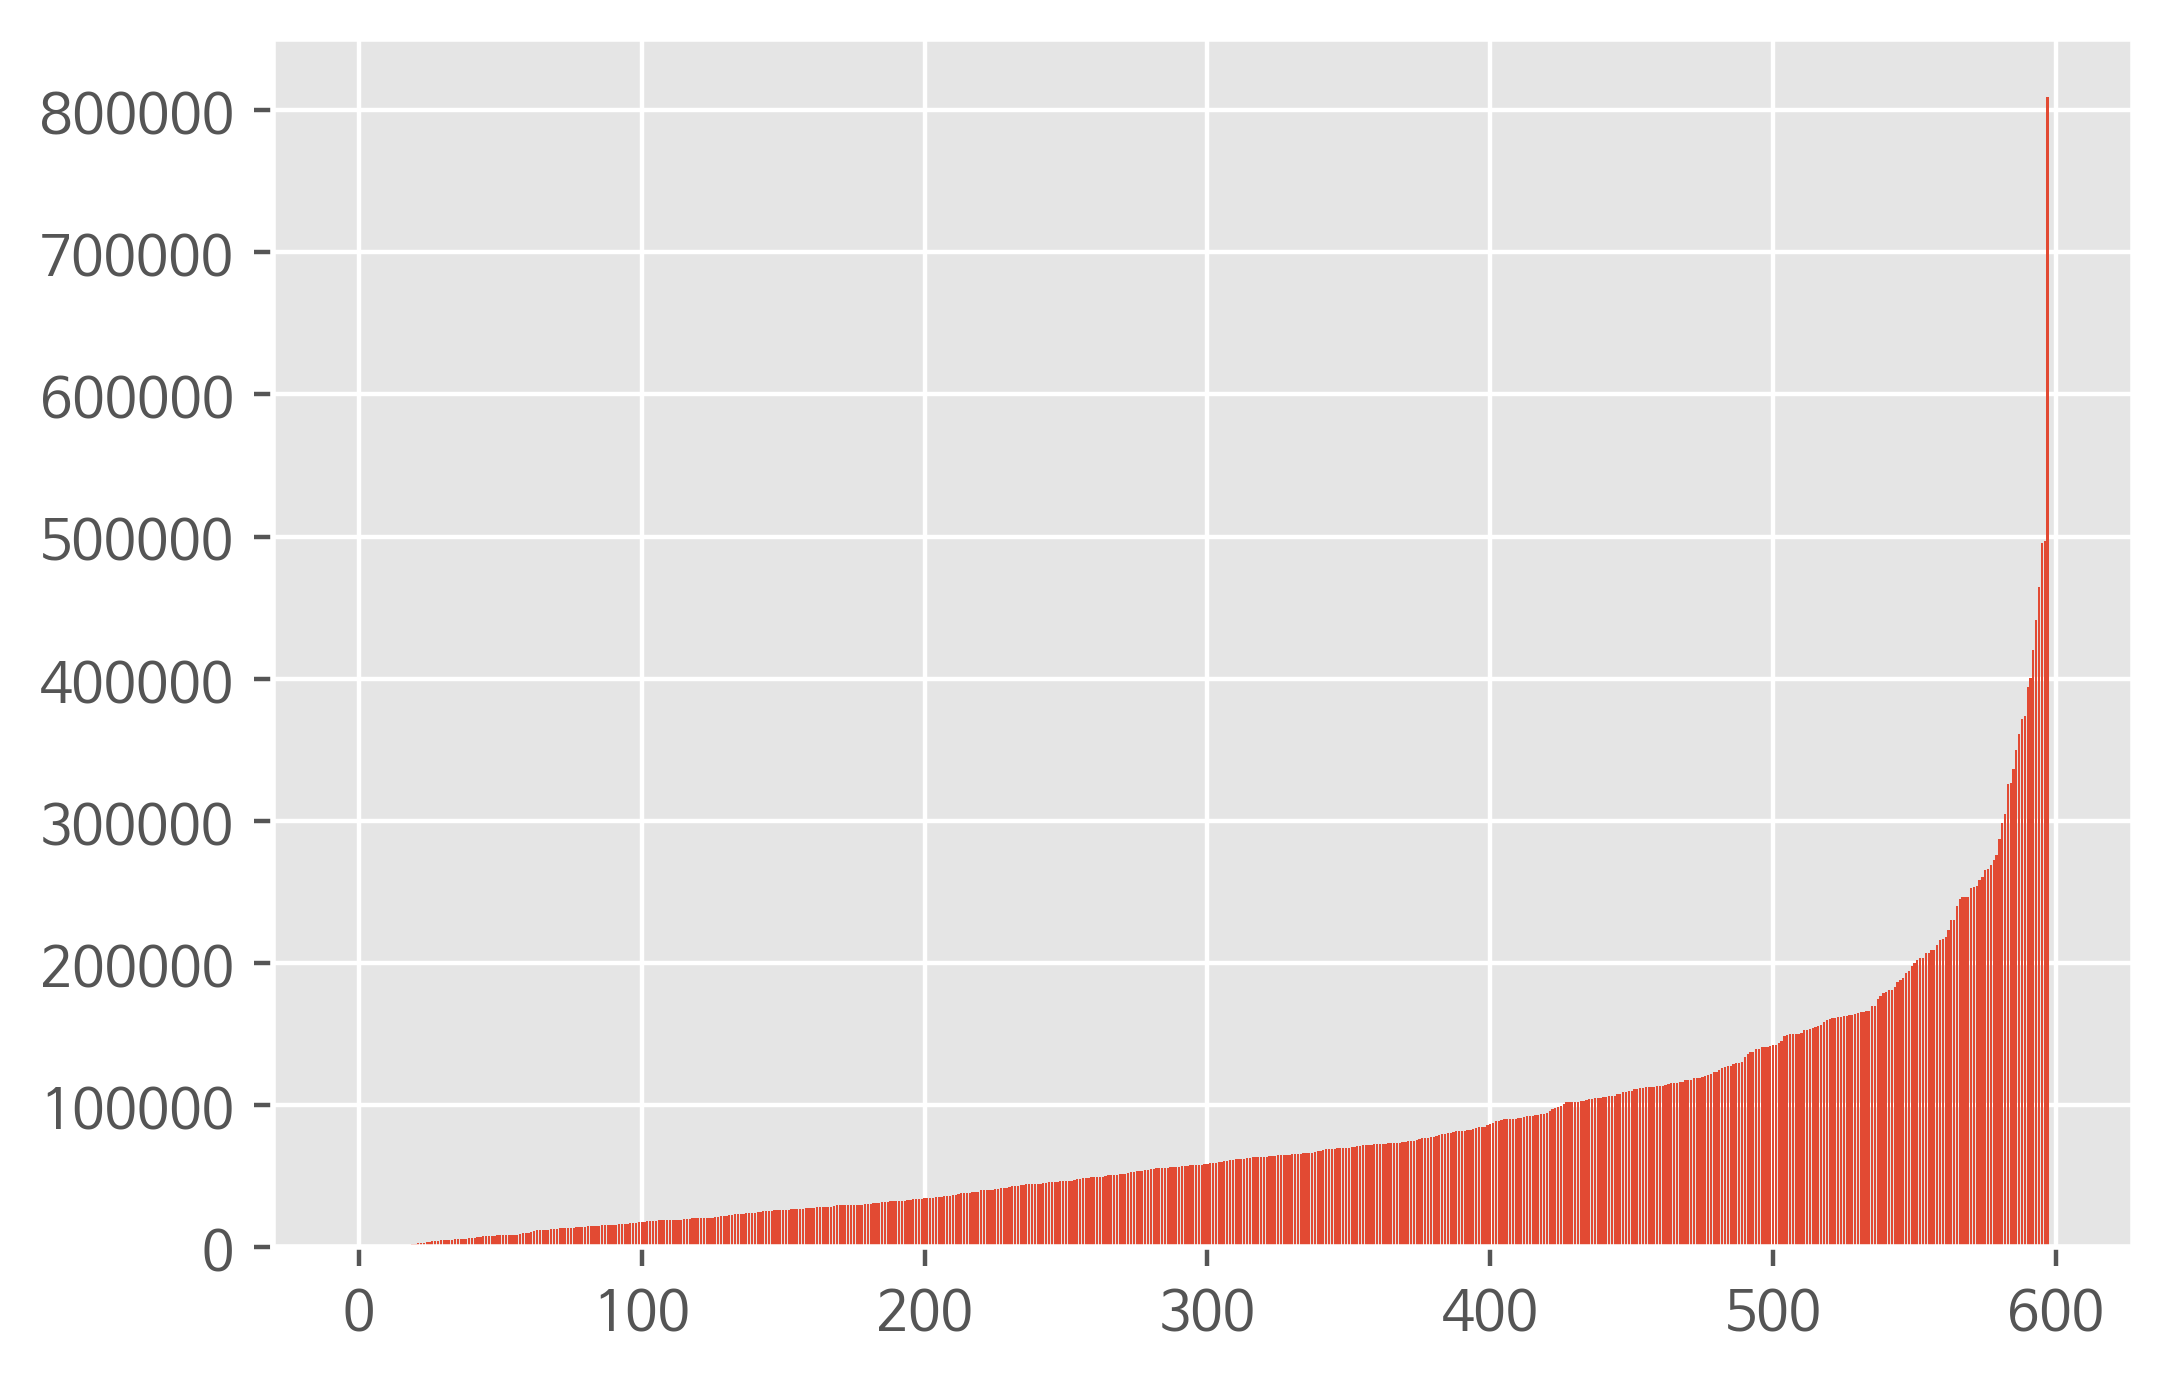

In [12]:
import csv
import matplotlib.pyplot as plt

f = open('/content/subwayTime.csv')
data = csv.reader(f)

next(data)
next(data)

result = [] # 아침 7시  ~ 9시 승차 데이터 추출 (10, 12, 14번째 인덱스)

for row in data:
  row[4:] = map(int, row[4:])
  result.append(sum(row[10:15:2])) # 10, 12, 14를 추출한다.

result.sort() #데이터를 오름차순 정렬

# 데이터 시각화
plt.figure(dpi=200)
plt.style.use('ggplot')
plt.bar(range(len(result)), result)
plt.show()

7시부터 9시까지 승차인원 합계의 최댓값 찾기

In [15]:
import csv
import matplotlib.pyplot as plt

f = open('/content/subwayTime.csv')
data = csv.reader(f)

next(data)
next(data)

mx = 0
mx_station = ''

for row in data:
  row[4:] = map(int, row[4:])
  if sum(row[10:15:2]) > mx:
    mx = sum(row[10:15:2])
    mx_station = row[3] + '(' + row[1] + ')'
print(mx_station, mx) 



신림(2호선) 809541


출근 시간대에 사람들이 가장 많이 내리는 역 찾기

In [16]:
import csv
import matplotlib.pyplot as plt

f = open('/content/subwayTime.csv')
data = csv.reader(f)

next(data)
next(data)

mx = 0
mx_station = ''

for row in data:
  row[4:] = map(int, row[4:])
  if sum(row[11:16:2]) > mx:   # 아침 7시  ~ 9시 하차 인원 값을 추출하기
    mx = sum(row[11:16:2])
    mx_station = row[3] + '(' + row[1] + ')'
print(mx_station, mx) 



강남(2호선) 984427


퇴근시간대 사람들이 가장 많이 타고 내리는 역은 어디일까?

저녁 6시 ~ 8시 하차인원 최대 역 찾기</br> 
-> 막대그리프로 퇴근시간대 승차 인원 표출</br> 
-> 최대 승차역</br> 
-> 최대 하차역</br> 

In [38]:
import csv
import matplotlib.pyplot as plt

f = open('/content/subwayTime.csv')
data = csv.reader(f)

next(data)
next(data)

mx = 0
mx_station = ''


for row in data:
  row[4:] = map(int, row[4:])
  if sum(row[32:35:2]) > mx:   # 저녁 6시  ~ 8시 승차 인원 값을 추출하기
    mx = sum(row[32:35:2])
    mx_station = row[3] + '(' + row[1] + ')'
print(f'저녁 6시  ~ 8시 최대 승차역은 {mx_station}역이고 인원은{mx}명 입니다.') 



저녁 6시  ~ 8시 최대 승차역은 강남(2호선)역이고 인원은723636명 입니다.


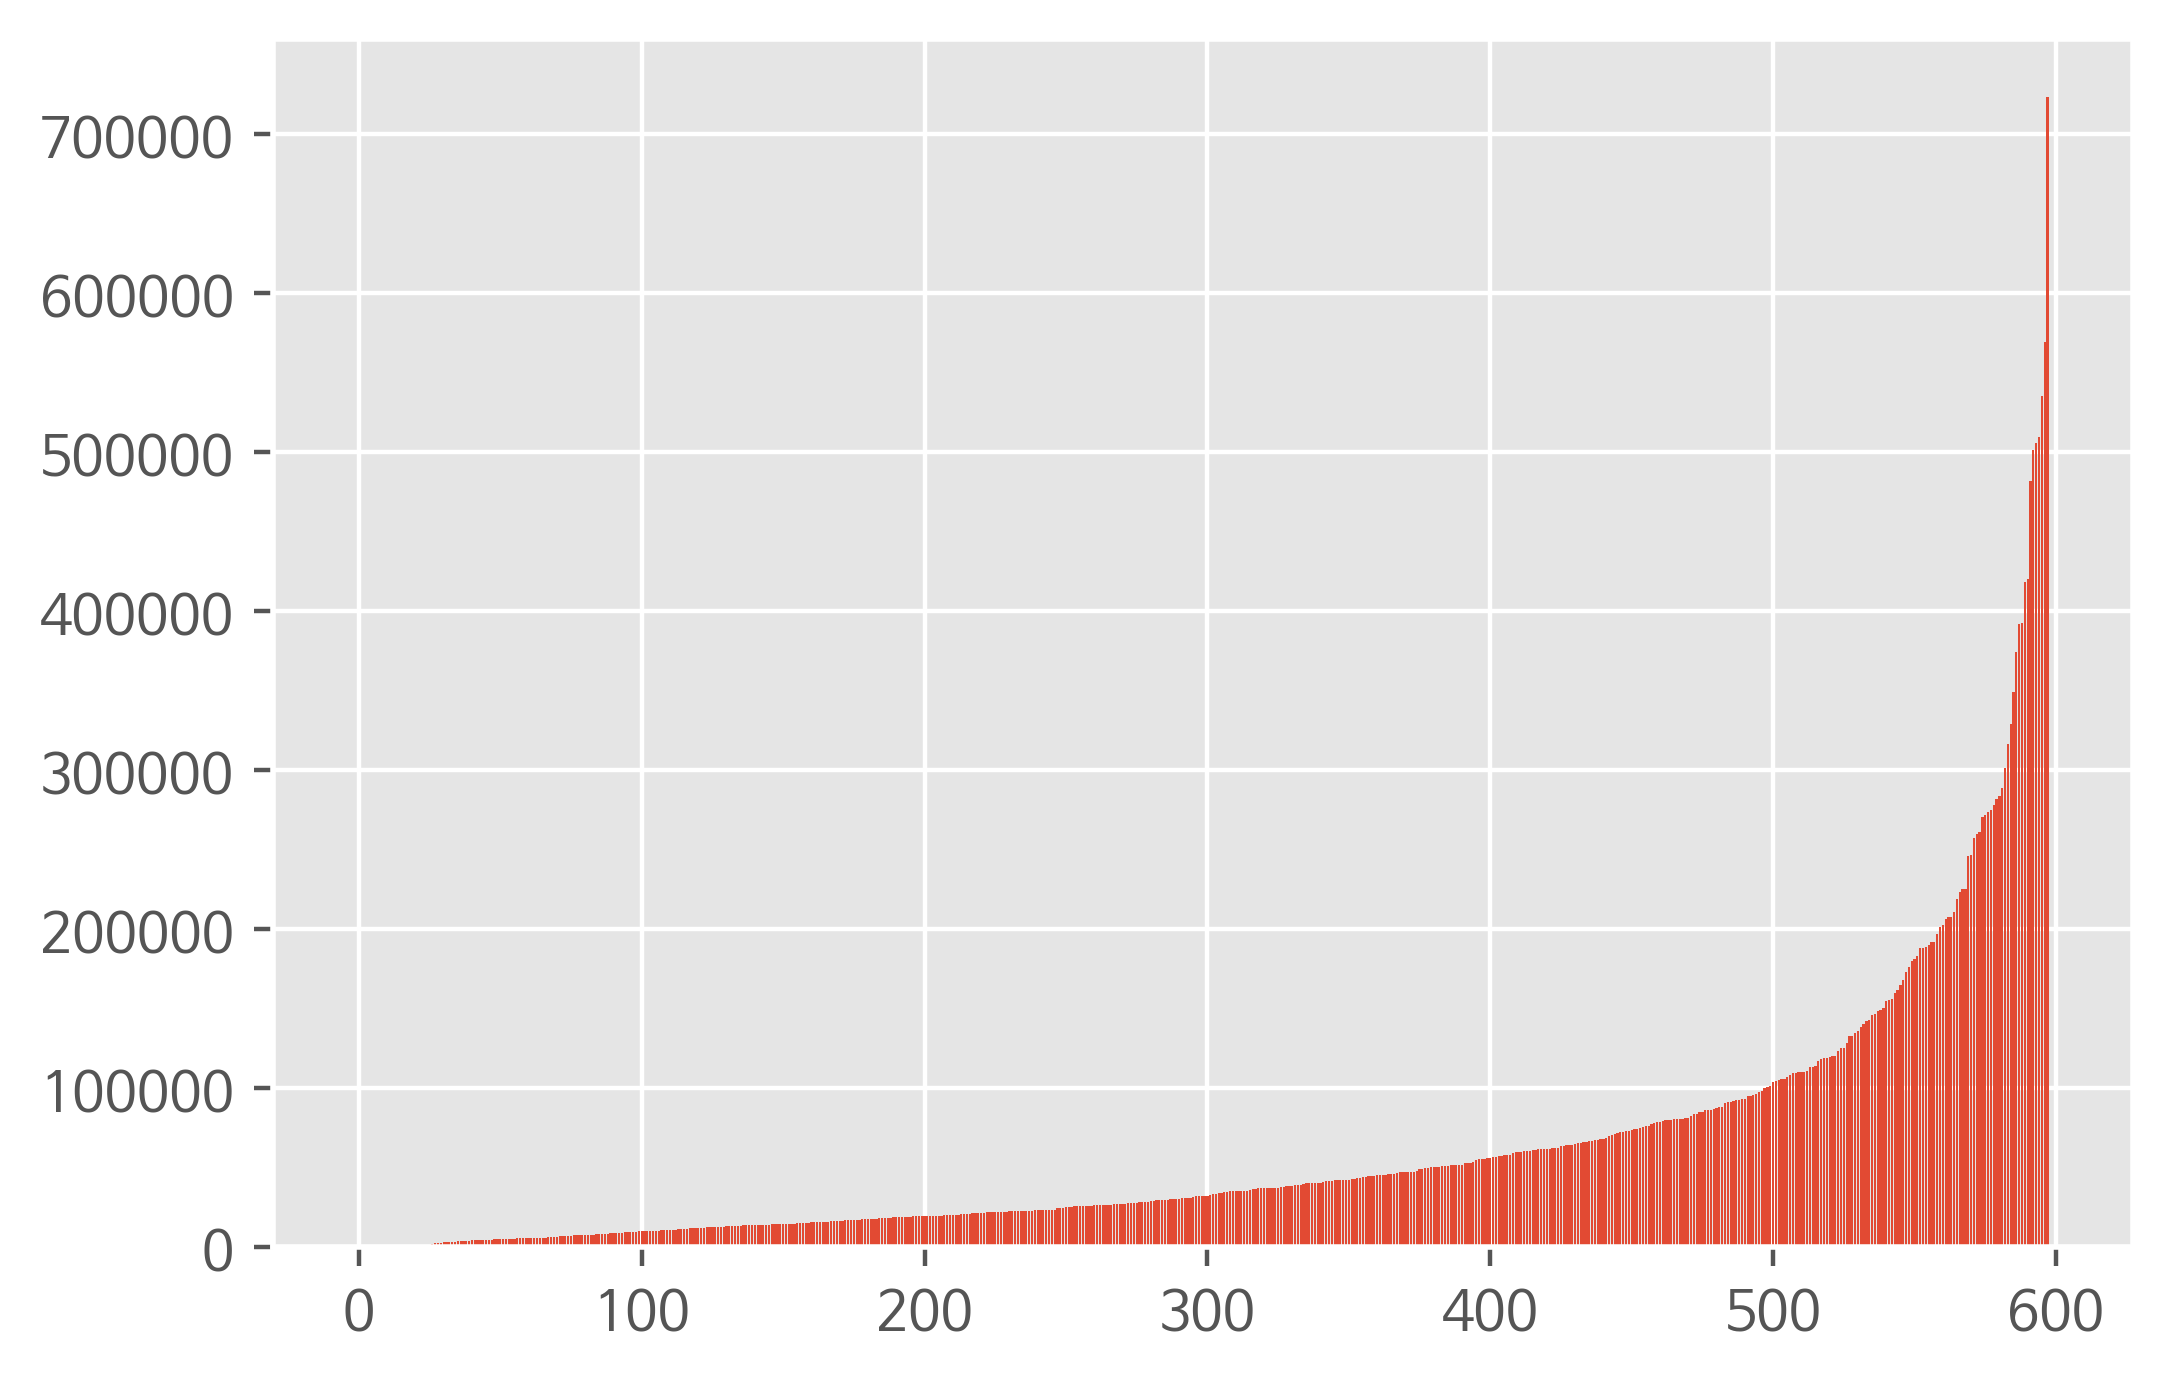

In [31]:
import csv
import matplotlib.pyplot as plt

f = open('/content/subwayTime.csv')
data = csv.reader(f)

next(data)
next(data)

result = [] # 아침 7시  ~ 9시 승차 데이터 추출 (10, 12, 14번째 인덱스)

for row in data:
  row[4:] = map(int, row[4:])
  result.append(sum(row[32:35:2]))

result.sort() #데이터를 오름차순 정렬

# 데이터 시각화
plt.figure(dpi=200)
plt.style.use('ggplot')
plt.bar(range(len(result)), result)
plt.show()

In [35]:
import csv
import matplotlib.pyplot as plt

f = open('/content/subwayTime.csv')
data = csv.reader(f)

next(data)
next(data)

mx = 0
mx_station = ''

for row in data:
  row[4:] = map(int, row[4:])
  if sum(row[33:36:2]) > mx:   # 저녁 6시  ~ 8시 승차 인원 값을 추출하기
    mx = sum(row[33:36:2])
    mx_station = row[3] + '(' + row[1] + ')'
print(f'저녁 6시  ~ 8시 최대 하차역은 {mx_station}역이고 인원은{mx}명 입니다.') 



저녁 6시  ~ 8시 최대 하차역은 신림(2호선)역이고 인원은561336명 입니다.


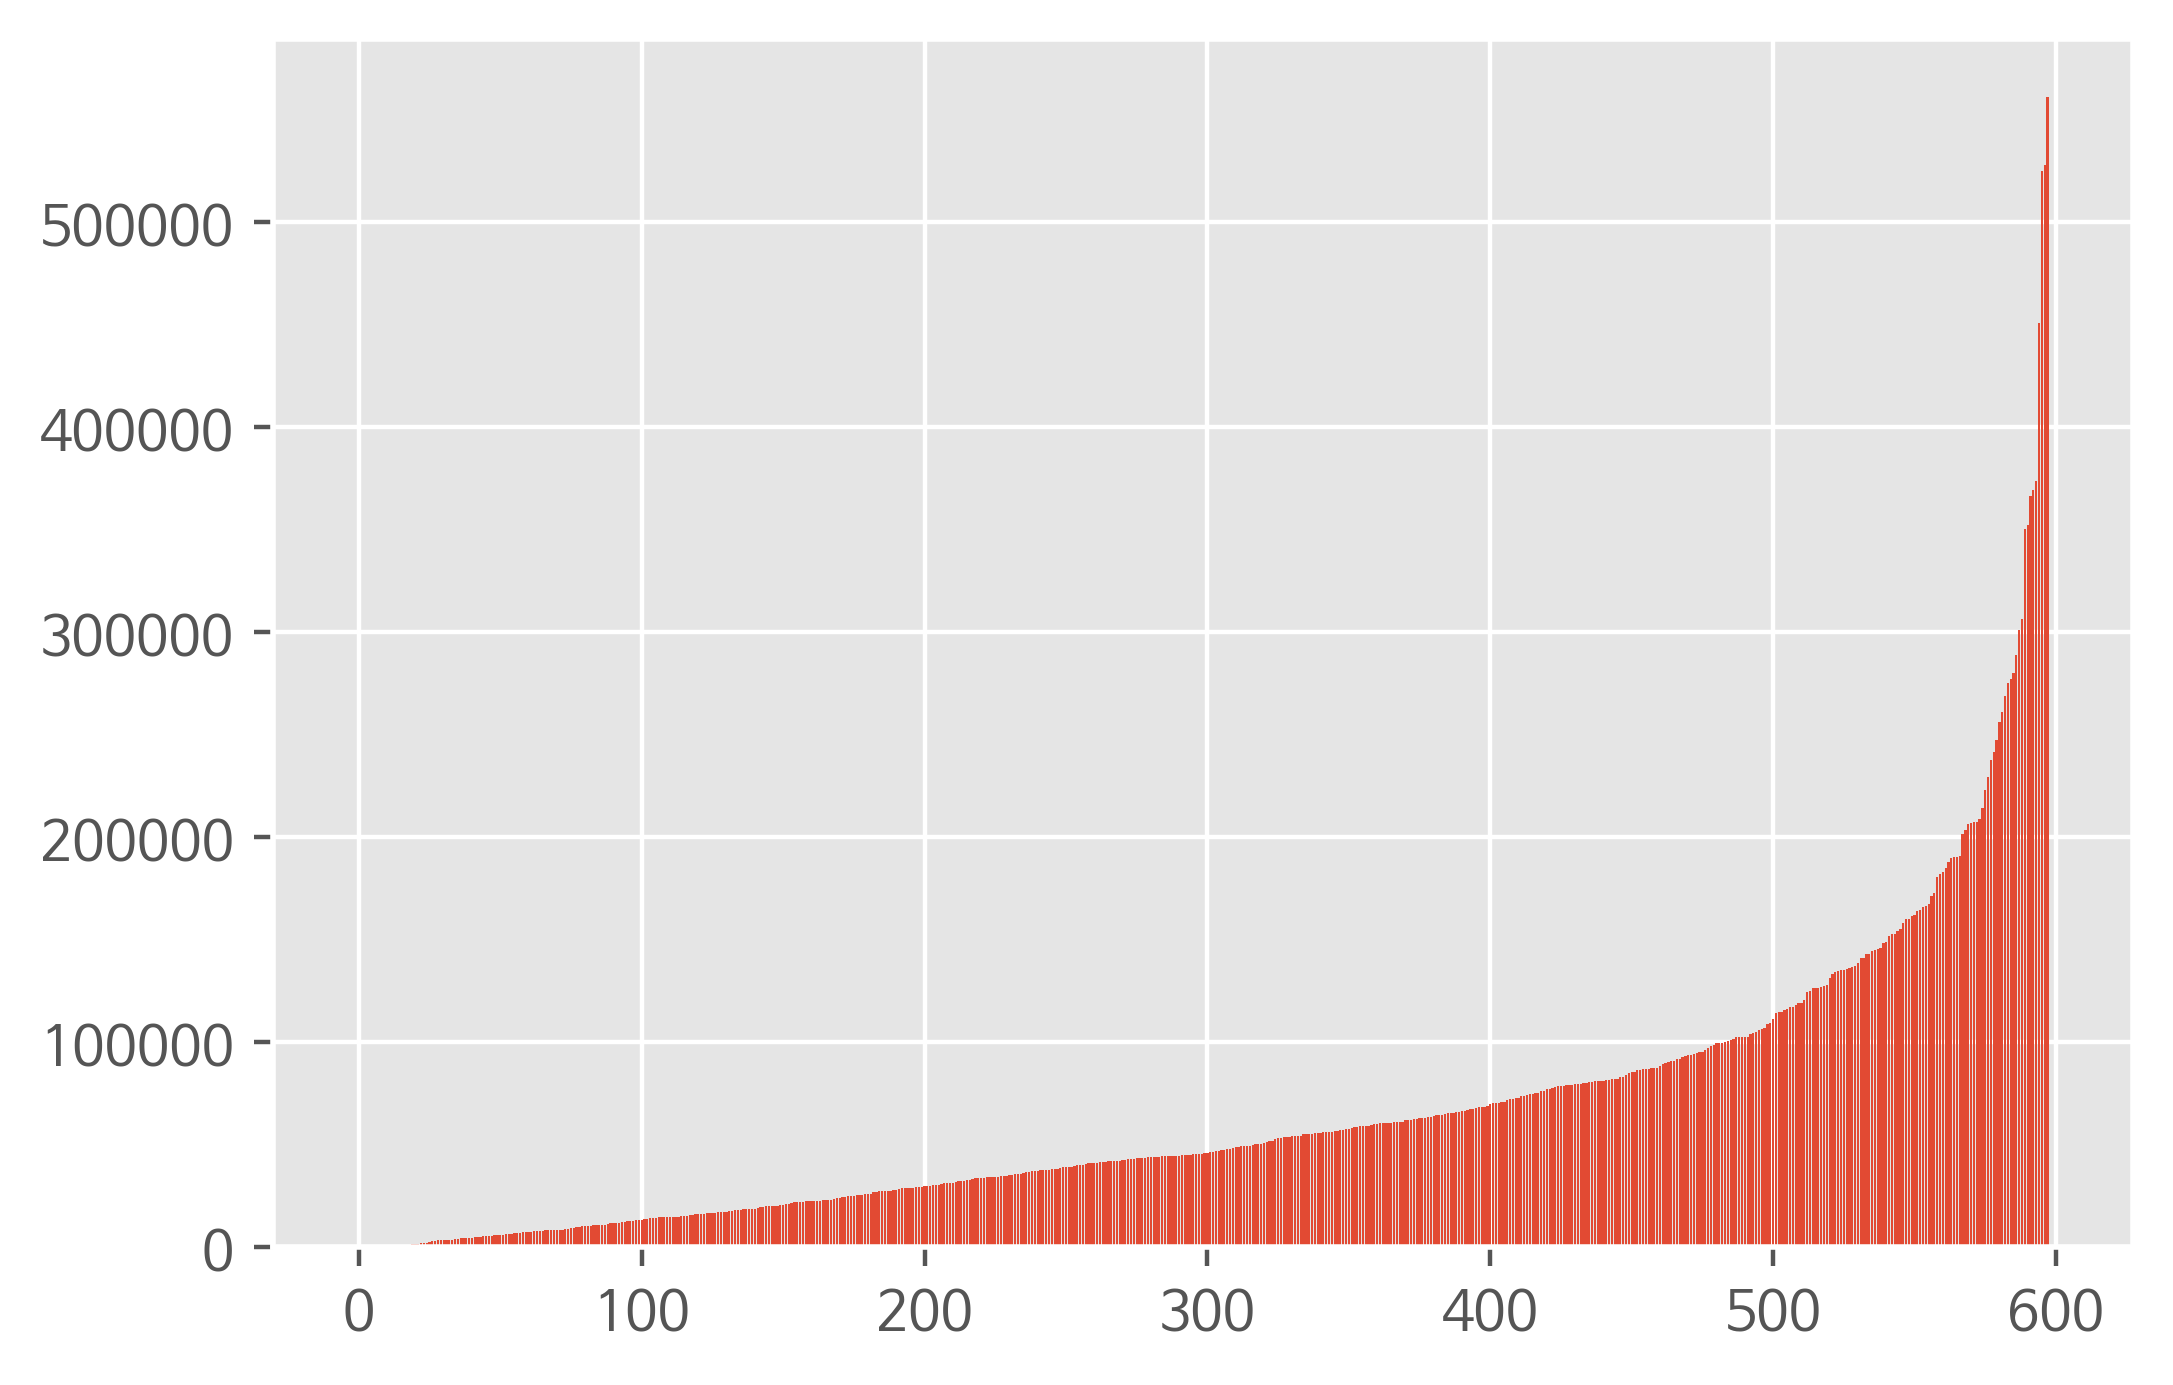

In [36]:
import csv
import matplotlib.pyplot as plt

f = open('/content/subwayTime.csv')
data = csv.reader(f)

next(data)
next(data)

result = [] # 아침 7시  ~ 9시 승차 데이터 추출 (10, 12, 14번째 인덱스)

for row in data:
  row[4:] = map(int, row[4:])
  result.append(sum(row[33:36:2]))

result.sort() #데이터를 오름차순 정렬

# 데이터 시각화
plt.figure(dpi=200)
plt.style.use('ggplot')
plt.bar(range(len(result)), result)
plt.show()

유임승차, 유임하차, 무임승차, 무임하차의 최대값 구하기

In [39]:
import pandas as pd

subway_df = pd.read_csv('/content/subwayfee.csv', encoding='cp949')
subway_df.head()
 
subway_user = subway_df[['유임승차', '유임하차','무임승차', '무임하차']]
subway_user.max()

유임승차    3153418
유임하차    3210437
무임승차     387062
무임하차     400607
dtype: int64

In [13]:
subway_df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764
1,2019-01,1호선,151,시청,676932,676266,102388,101033
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062
3,2019-01,1호선,153,종로3가,703110,674148,387062,362735
4,2019-01,1호선,154,종로5가,571824,583955,275447,263687


In [31]:
subway_df.groupby('유임승차').max()

,사용월,호선명,역ID,지하철역,유임하차,무임승차,무임하차
유임승차,,,,,,,
2,2019-01,일산선,1949,홍대입구,0,0,0
5,2019-01,경의선,1297,검암,0,0,0
7,2019-01,경의선,1296,계양,0,0,0
10,2019-01,경의선,1295,김포공항,0,0,0
11,2019-01,경의선,1291,서울역,0,0,0
...,...,...,...,...,...,...,...
1790096,2019-01,2호선,232,구로디지털단지,1784632,182537,185035
1928249,2019-01,2호선,230,신림,1883865,249174,254427
2351935,2019-01,2호선,239,홍대입구,2507561,114832,111488


In [32]:
subway_df.groupby('유임하차').max()

,사용월,호선명,역ID,지하철역,유임승차,무임승차,무임하차
유임하차,,,,,,,
0,2019-01,일산선,2615,홍대입구,55,2,0
566,2019-01,중앙선,1220,지평,615,501,479
747,2019-01,수인선,1878,달월,1038,865,431
788,2019-01,경원선,1011,옥수,1445,121,91
2825,2019-01,중앙선,1213,신원,3187,2438,2179
...,...,...,...,...,...,...,...
1784632,2019-01,2호선,232,구로디지털단지,1790096,182537,185035
1883865,2019-01,2호선,230,신림,1928249,249174,254427
2311873,2019-01,2호선,216,잠실(송파구청),2416810,209079,198791


In [33]:
subway_df.groupby('무임승차').max()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임하차
무임승차,,,,,,,
0,2019-01,일산선,1949,홍대입구,25,0,0
2,2019-01,6호선,2615,충무로,55,0,0
121,2019-01,경원선,1011,옥수,1445,788,91
501,2019-01,중앙선,1220,지평,615,566,479
720,2019-01,경춘선,1325,백양리,8614,8259,766
...,...,...,...,...,...,...,...
275949,2019-01,3호선,311,연신내,998373,946477,268661
291705,2019-01,경부선,1006,영등포,1227641,1292898,289797
352121,2019-01,1호선,158,청량리(서울시립대입구),463456,482960,357571


In [34]:
subway_df.groupby('무임하차').max()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차
무임하차,,,,,,,
0,2019-01,일산선,2615,홍대입구,55,0,2
91,2019-01,경원선,1011,옥수,1445,788,121
431,2019-01,수인선,1878,달월,1038,747,865
479,2019-01,중앙선,1220,지평,615,566,501
766,2019-01,경춘선,1325,백양리,8614,8259,720
...,...,...,...,...,...,...,...
268661,2019-01,3호선,311,연신내,998373,946477,275949
289797,2019-01,경부선,1006,영등포,1227641,1292898,291705
357571,2019-01,1호선,158,청량리(서울시립대입구),463456,482960,352121


In [43]:
subway_df.groupby('지하철역')['유임승차', '유임하차', '무임승차','무임하차'].max()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,유임승차,유임하차,무임승차,무임하차
지하철역,,,,
4.19민주묘지,49789,48250,28647,26730
가능,152256,140676,58533,56804
가락시장,234180,228265,78795,77067
가산디지털단지,1200693,1191942,82182,77361
가양,506045,487879,125108,121141
...,...,...,...,...
회기,684067,666710,129129,128734
회룡,249439,235179,144082,145171
회현(남대문시장),705485,758424,198383,197336
